In [6]:
from sklearn.model_selection import train_test_split

def stratified_splitter(df, label_col, valid_pct=0.2, seed=None):
    # Extract labels
    labels = df[label_col]
    
    # Perform a stratified split to maintain label proportions
    train_idxs, valid_idxs = train_test_split(range(len(df)), test_size=valid_pct, 
                                              stratify=labels, random_state=seed)
    
    return train_idxs, valid_idxs

C:\Users\Joshua\anaconda3\envs\automate\Lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
C:\Users\Joshua\anaconda3\envs\automate\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


['Blazer', 'Blouse', 'Cardigan', 'Coat', 'Culottes', 'Dress', 'Hoodie', 'Jacket', 'Jeans', 'Jersey', 'Joggers', 'Sandal', 'Shoe', 'Shorts', 'Skirt', 'Sweater', 'Sweatpants', 'Sweatshorts', 'Tee', 'Top']


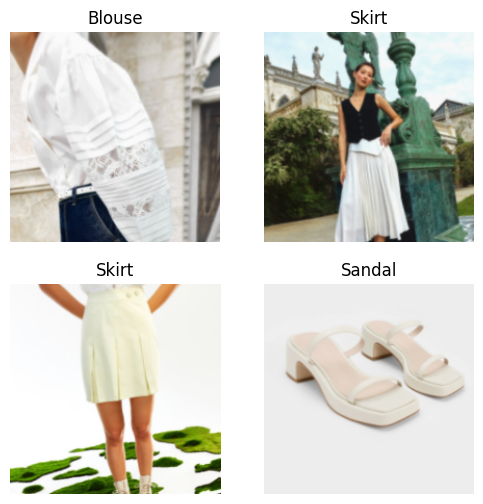

In [1]:
from fastai.vision.all import *

# Path to the folder containing images
# path = r'C:\Users\Joshua\Machine Learning\FYP\download_images'
# path = Path('.')

# Load your dataset
csv_file_path = r'C:\Users\Joshua\Machine Learning\FYP\image_labels.csv'
df = pd.read_csv(csv_file_path)

# df = pd.read_csv('image_labels.csv') 

# Create the DataLoaders
data = ImageDataLoaders.from_df(df, 
                                path = '.',  # Adjust as necessary
                                fn_col=0, 
                                label_col=1, 
                                valid_pct=0.2, 
                                seed=42,  # Adjust as necessary
                                item_tfms=Resize(224), 
                                batch_tfms=aug_transforms(size=224, min_scale=0.75),
                                splitter=lambda: stratified_splitter(df, label_col=1, valid_pct=0.2, seed=42))

# Check the vocabulary
print(data.vocab)
#show batch
data.show_batch(max_n=4)


In [8]:
# Recreate the learner with the same architecture
learn = cnn_learner(data, resnet34, metrics=accuracy)

C:\Users\Joshua\anaconda3\envs\automate\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [9]:
# Load the saved model

model_path = r'C:\Users\Joshua\Machine Learning\FYP\stage-1_resnet34.pkl'
model = torch.load(model_path)
learn.model = model

In [10]:
# Fine-tune the model
learn.fine_tune(epochs=6)


epoch,train_loss,valid_loss,accuracy,time
0,10.767016,8.898887,0.000000,00:13


epoch,train_loss,valid_loss,accuracy,time
0,11.471730,9.095318,0.000000,00:13
1,11.036880,9.274481,0.000000,00:13
2,11.043077,9.459998,0.000000,00:13
3,10.973490,9.645336,0.000000,00:13
4,11.004226,9.822098,0.000000,00:13
5,10.964663,10.053574,0.000000,00:12


In [11]:
learn.export(r'C:\Users\Joshua\Machine Learning\FYP\updated_model.pkl')
learn.export(r'C:\Users\Joshua\Documents\GitHub\TopCareFashion\backend\ML\updated_model.pkl')


In [ ]:
# C:\Users\Joshua\Documents\GitHub\TopCareFashion\backend\ML